## Exercícios

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Questão 1 \
O dataset "real_state_ny.csv" mostra dados de casas à venda no estado de Nova Iorque, nos EUA. Utilizando este dataset: \
a) Informe a média, a mediana e o desvio padrão do preço das casas de 3 quartos (bed = 3) da cidade de Albany (city = 'Albany') \
b) Gere um boxplot do preço do imóvel por número de quartos na cidade de Albany. Limite o número de quartos a no máximo 5.

In [2]:
df = pd.read_csv("real_state_ny.csv")
df.head(5)

,Unnamed: 0,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
1,54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
2,54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
3,54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
4,54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0


In [3]:
df2 = df[(df['bed'] == 3) & (df['city'] == 'Albany')]
print(f'Média de preço: $ {df2['price'].mean():.2f}')
print(f'Mediana de preço: $ {df2["price"].median():.2f}')
print(f'Desvio padrão de preço: $ {df2["price"].std():.2f}')

Média de preço: $ 218427.44
Mediana de preço: $ 209900.00
Desvio padrão de preço: $ 98029.64


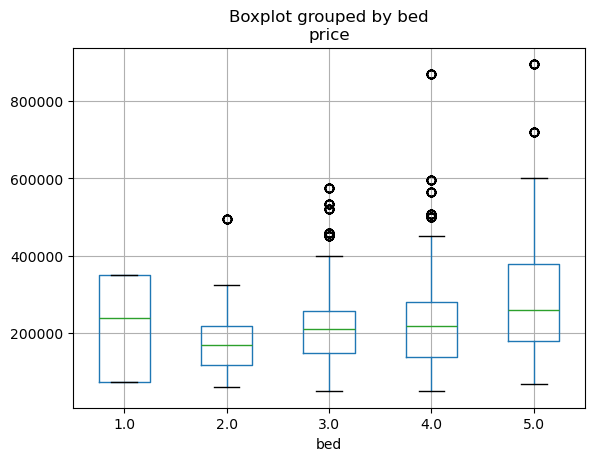

In [4]:
df3 = df[(df['city'] == 'Albany') & (df['bed'] <= 5)]
df3.boxplot(by='bed', column='price')
plt.show()

Questão 2 \
Plote um gráfico de pizza que mostre a porcentagem de imóveis por número de quartos para a cidade de Albany.

/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_36800/4078464839.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currentSum = df4[df['bed'] == bed_qty]['price'].sum()
/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_36800/4078464839.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currentSum = df4[df['bed'] == bed_qty]['price'].sum()
/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_36800/4078464839.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currentSum = df4[df['bed'] == bed_qty]['price'].sum()
/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_36800/4078464839.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currentSum = df4[df['bed'] == bed_qty]['price'].sum()
/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_36800/4078464839.py:7: UserWarning: Boolean Series key will be reindexed to match Dat

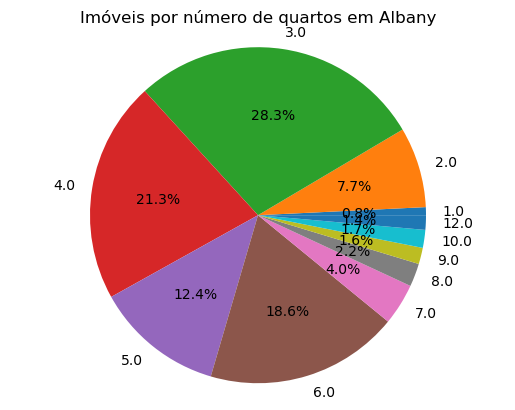

In [5]:
df4 = df[df['city'] == 'Albany']
labels = df4['bed'].unique()
labels.sort()
sizes = []

for bed_qty in labels:
    currentSum = df4[df['bed'] == bed_qty]['price'].sum()
    sizes.append(currentSum)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Imóveis por número de quartos em Albany')
plt.axis('equal')
plt.show()

Questão 3 \
Plote um gráfico de barras que mostre o preço médio das casas de acordo com o número de banheiros nas cidades de New York, Albany, Yonkers e Long Beach. Limite o número de banheiros a 4, ou seja, descarte os imóveis que tenham mais que 4 banheiros.

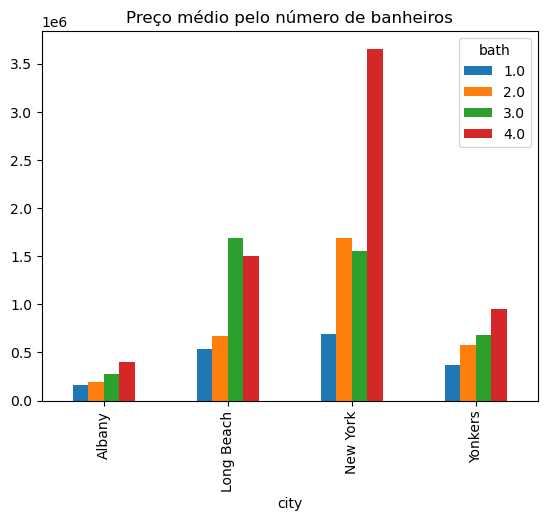

In [6]:
allowedCities = ['New York', 'Albany', 'Yonkers', 'Long Beach']
df5 = df[(df['city'].isin(allowedCities)) & (df['bath'] <= 4)]

summary = pd.crosstab(df5['city'], df5['bath'], values=df5['price'], aggfunc='mean')
summary.plot(kind='bar', stacked=False)

plt.title('Preço médio pelo número de banheiros')
plt.show()

Questão 4 \
Plote dois histogramas lado a lado comparando o preço dos imóveis nas cidades de Yokers e Albany. Use bins=15.

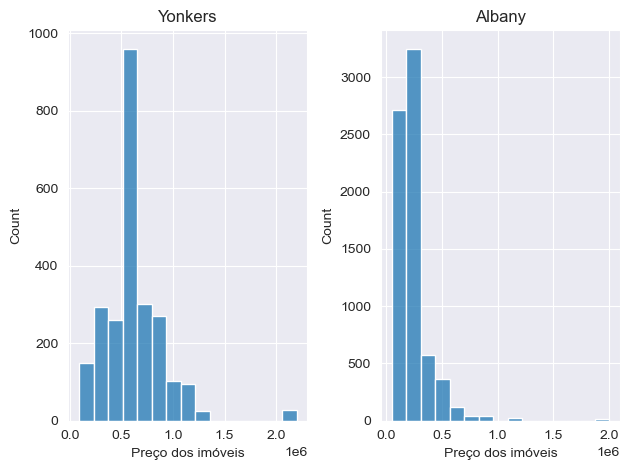

In [7]:
dfYokers = df[df['city'] == 'Yonkers']
dfAlbany = df[df['city'] == 'Albany']

sns.set_style('darkgrid')

plt.subplot(1, 2, 1)
sns.histplot(dfYokers['price'], bins=15, kde=False)
plt.title('Yonkers')
plt.xlabel('Preço dos imóveis')

plt.subplot(1, 2, 2)
sns.histplot(dfAlbany['price'], bins=15, kde=False)
plt.title('Albany')
plt.xlabel('Preço dos imóveis')

plt.tight_layout()
plt.show()